# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor  
 
dtr = DecisionTreeRegressor()  
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
# Acá realizá la predicción

y_pred = dtr.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE = ',rmse)

RMSE =  25696.61599212734


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
rmses_train = []
rmses_test = []

for max_depth in np.arange(1,30,5):
    
    dtr = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
    dtr.fit(X_train, y_train)
    
    y_pred_train = dtr.predict(X_train)
    y_pred_test = dtr.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    
    rmses_train.append(rmse_train)
    rmses_test.append(rmse_test)

rmses_train = np.array(rmses_train)
rmses_test = np.array(rmses_test)

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

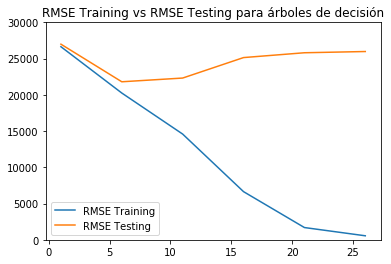

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [9]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(X_train, y_train)

y_pred = knr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE = ',rmse)


RMSE =  23358.517587172537


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [10]:
# Calculá los cambio en el rmse en esta celda

rmses_train = []
rmses_test = []

for n_neighbors in np.arange(1,30,1):
    
    knr = KNeighborsRegressor(n_neighbors = n_neighbors)
    knr.fit(X_train, y_train)
    
    y_pred_train = knr.predict(X_train)
    y_pred_test = knr.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    
    rmses_train.append(rmse_train)
    rmses_test.append(rmse_test)

rmses_train = np.array(rmses_train)
rmses_test = np.array(rmses_test)

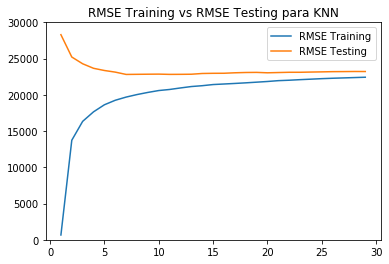

In [11]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [12]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [13]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(max_depth=5)

reg_scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
reg_scores = nmsq2rmse(reg_scores)

print('Regressor Scores: ',reg_scores)
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (reg_scores.mean(), reg_scores.std() * 2))

Regressor Scores:  [23075.81707882 22701.1662687  22811.3397053  22542.96932204
 23162.03968873 21231.97224167 22694.34021123 23307.83887209
 22578.06628607 23962.30224595]
Accuracy para Tree: 22806.79 (+/- 1328.25)


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [14]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [15]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [16]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,129000.000,117423.922,11576.078
1,174000.000,136365.354,37634.646
2,115000.000,120896.290,5896.290
3,87000.000,108434.620,21434.620
4,118000.000,139866.191,21866.191
5,140000.000,120896.290,19103.710
6,93500.000,108464.298,14964.298
7,160000.000,151545.269,8454.731
8,135000.000,119926.365,15073.635
9,85000.000,83810.957,1189.043
